In [15]:
# R.version.string
# install.packages("remotes")
# remotes::install_github("plotly/dashR", upgrade = "always")
library(dash)
library(tidyverse)
library(ggplot2)


In [3]:
hits <- read.csv('../data/processed/audio_data_processed.csv')
hits <- hits[,!(names(hits) %in% c("Unnamed..0",'type','uri','track_href','analysis_url','id'))]

hits$rank_bin <-cut(hits$Rank, breaks = 10,labels=c('1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'))
titleParams <- list(c( "Vibe Features Over Rank",  "Energy, speechiness, instrumentalness,valence in different strata of the charts"),
c( "Rhythm Features Over Year",  "Time signature, tempo, duration occurences"),
c( "Musical Features Interaction",  "Musical key, mode occurences"))
start_year <- 2012; end_year<-2022
hits_c <- hits[(start_year <= hits$Year) & (hits$Year <= end_year),]
str(hits_c)
titleParams[[1]][1]


'data.frame':	1100 obs. of  20 variables:
 $ Year            : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Rank            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Title           : chr  "Somebody That I Used to Know" "Call Me Maybe" "We Are Young" "Payphone" ...
 $ Artist          : chr  "Gotye feat Kimbra" "Carly Rae Jepsen" "Fun feat Janelle Mon\303\241e" "Maroon 5 feat Wiz Khalifa" ...
 $ track_id        : chr  "0RtMRbaqeadQFvlYxcAczv" "3TGRqZ0a2l1LRblBkJoaDx" "7a86XRg84qjasly9f6bPSD" "1UhGntCpnptxUsNjFrweVe" ...
 $ popularity      : int  34 70 70 1 62 75 63 42 71 81 ...
 $ danceability    : num  0.646 0.783 0.378 0.782 0.703 0.722 0.562 0.769 0.747 0.726 ...
 $ energy          : num  0.642 0.58 0.638 0.674 0.731 0.851 0.939 0.787 0.716 0.787 ...
 $ key             : int  0 7 10 11 8 7 0 1 11 4 ...
 $ loudness        : num  -6.19 -6.55 -5.58 -9.12 -6.28 ...
 $ mode            : int  1 1 1 1 0 0 1 1 0 1 ...
 $ speechiness     : num  0.0412 0.0408 0.075 0.0388 0.0311 0.06

[1] "Vibe Features Over Rank"

In [62]:
options(repr.plot.width=15, repr.plot.height=6)
hits$Year <- factor(hits$Year)
hits$key <- factor(hits$key)
hits$mode <- factor(hits$mode)

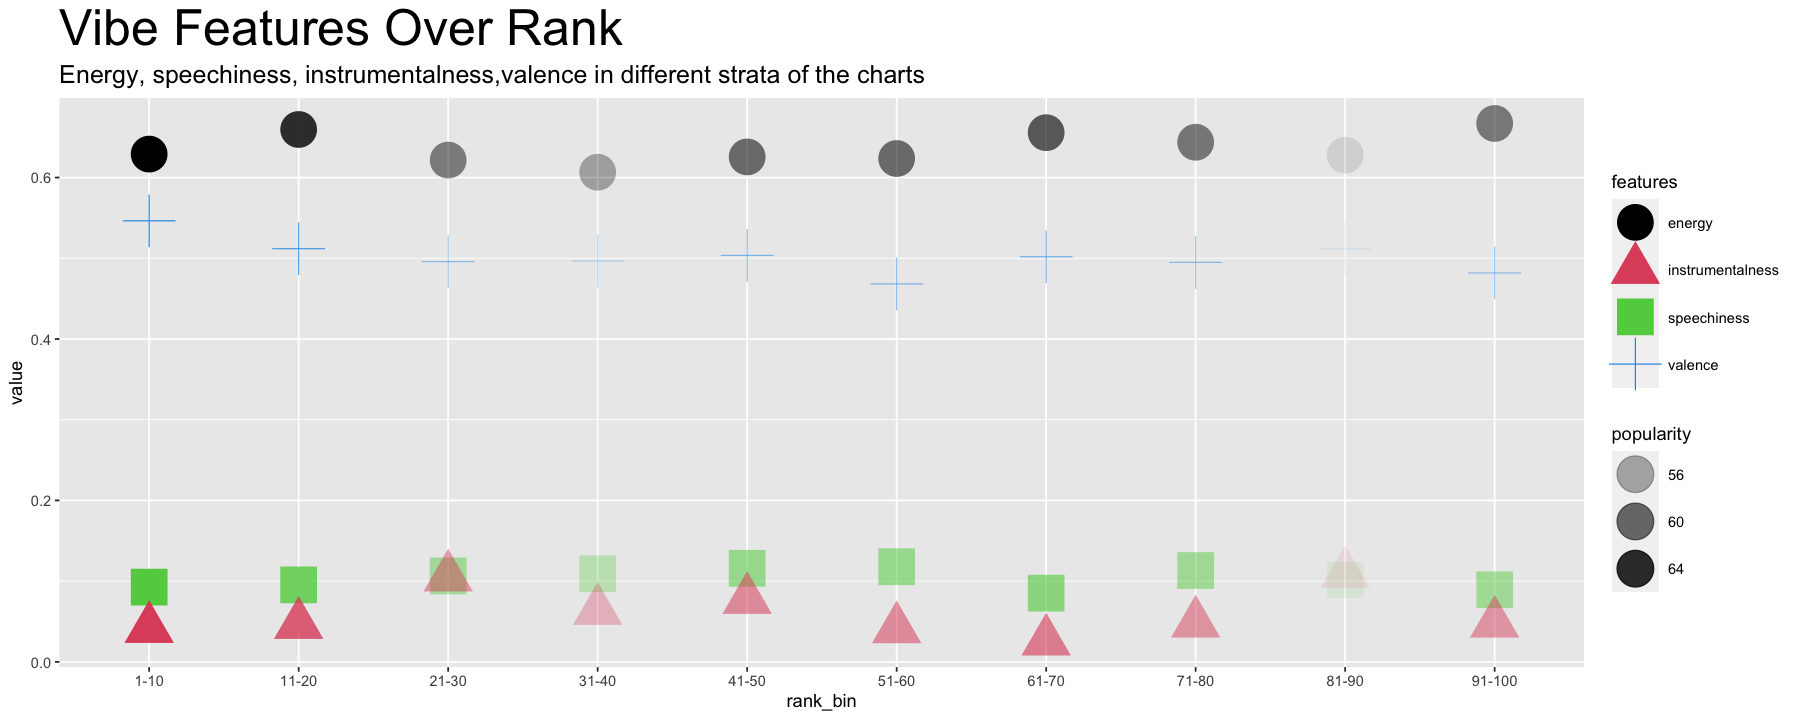

In [11]:
# Chart
options(repr.plot.width=15, repr.plot.height=6)
hits_c_bin <- hits_c %>% group_by(rank_bin) %>%   
summarise(popularity=mean(popularity),energy=mean(energy),speechiness=mean(speechiness),instrumentalness=mean(instrumentalness),valence=mean(valence)) %>% 
select(c('rank_bin','popularity','energy','speechiness','instrumentalness','valence'))

# # # stack those features
# # hits_c_bin_st <- hits_c_bin[,!(names(hits_c_bin) %in% c('energy','speechiness','instrumentalness','valence'))] %>% 
# # cbind(stack(hits_c_bin[c('energy','speechiness','instrumentalness','valence')])) %>%
# # rename(value=values, features=ind)
hits_c_bin_st <- hits_c_bin %>%  gather(features, value, -c(rank_bin,popularity)) # another way to stack


hits_c_bin_st %>%
  ggplot(aes(x=rank_bin,y=value)) + geom_point(aes(color = features,shape=features,alpha=popularity),size=10) +
    scale_colour_manual(values=c("1", "2", "3", "4"))+
    labs(title=titleParams[[1]][1], subtitle = titleParams[[1]][2])+
    theme(plot.title = element_text(size=30),plot.subtitle=element_text(size=15))

chart_describ <- 
"
 - The **energy** represents the intensity and activity; 
 - The **speechness** detects the degree of presence spoken words; 
 - The **instrumentalness** predicts whether a track contains no vocals; 
 - The **valence** describing the musical positiveness.
 "


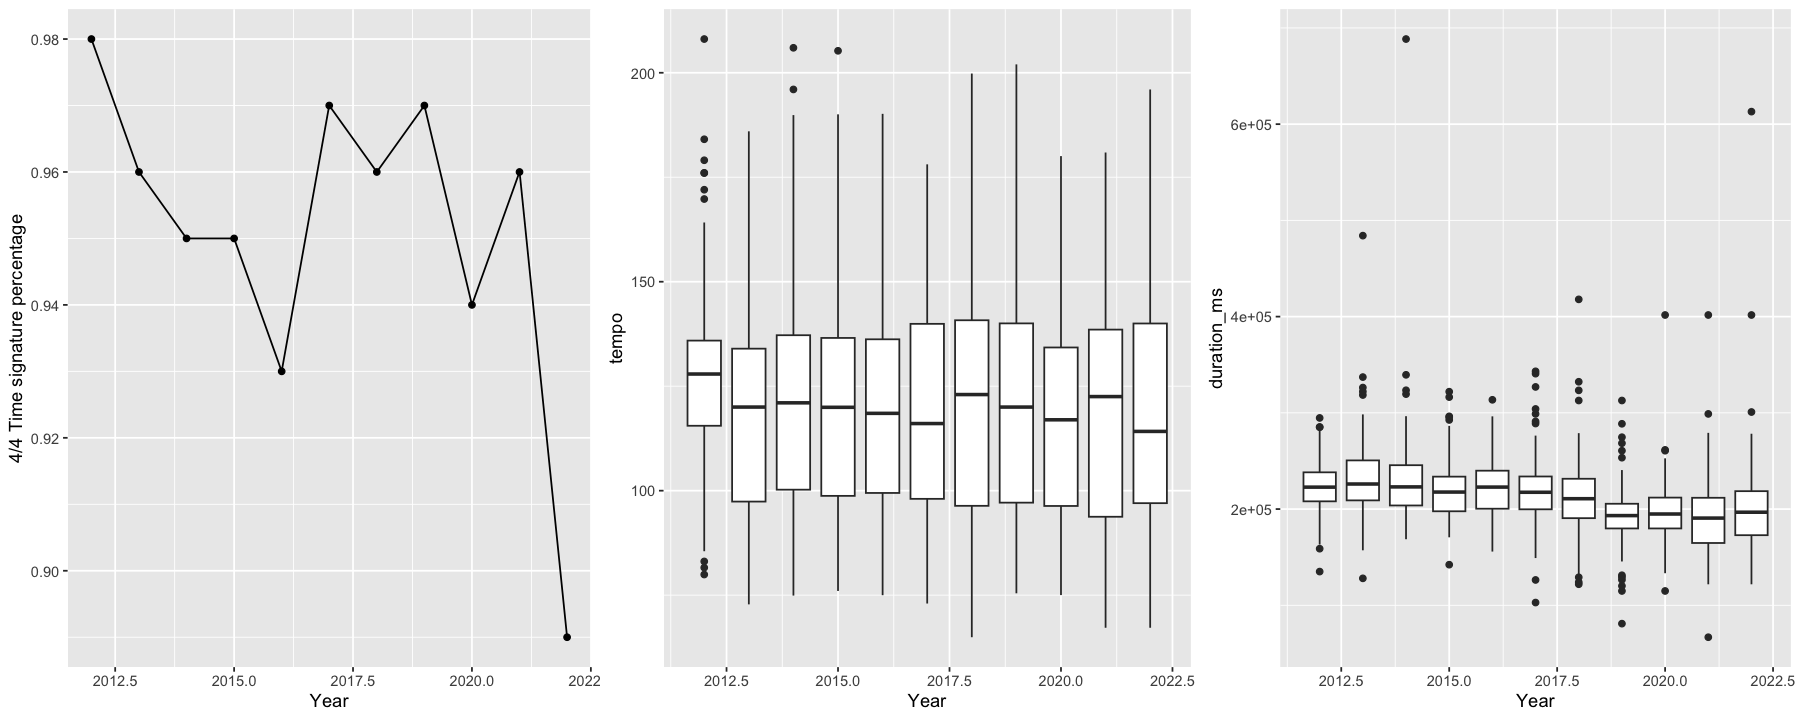

In [40]:
# Chart1
library(grid)
library(gridExtra)
library(ggplot2)

hits_c1 <- hits %>% group_by(Year,time_signature) %>% count() %>% rename(cnt=n) 
hits_c1$ts_perct <- hits_c1$cnt/100

plot2_1 <- ggplot(hits_c1[hits_c1['time_signature']==4,],aes(x=Year,y=ts_perct,group = 1))+
    geom_line()+
    geom_point()+
    labs(x='Year',y='4/4 Time signature percentage')
plot2_2 <- ggplot(hits[,c('Year','duration_ms','tempo')],aes(x=Year,y=tempo,group = Year))+
    geom_boxplot()
plot2_3 <- ggplot(hits[,c('Year','duration_ms','tempo')],aes(x=Year,y=duration_ms,group = Year))+
    geom_boxplot()
plot2 <- grid.arrange(plot2_1, plot2_2, plot2_3, ncol=3)

# subplot(plot2_1, plot2_2, plot2_3, nrows = 1) %>% 
#   layout(title = titleParams[[3]][1],annotations = list(
#   list(x = 0.8 , y = 1.05, text = titleParams[[3]][2], showarrow = F, xref='paper', yref='paper')))
# +
#     labs(title=titleParams[[2]][1], subtitle = titleParams[[2]][2])+
#     theme(plot.title = element_text(size=30),plot.subtitle=element_text(size=15))


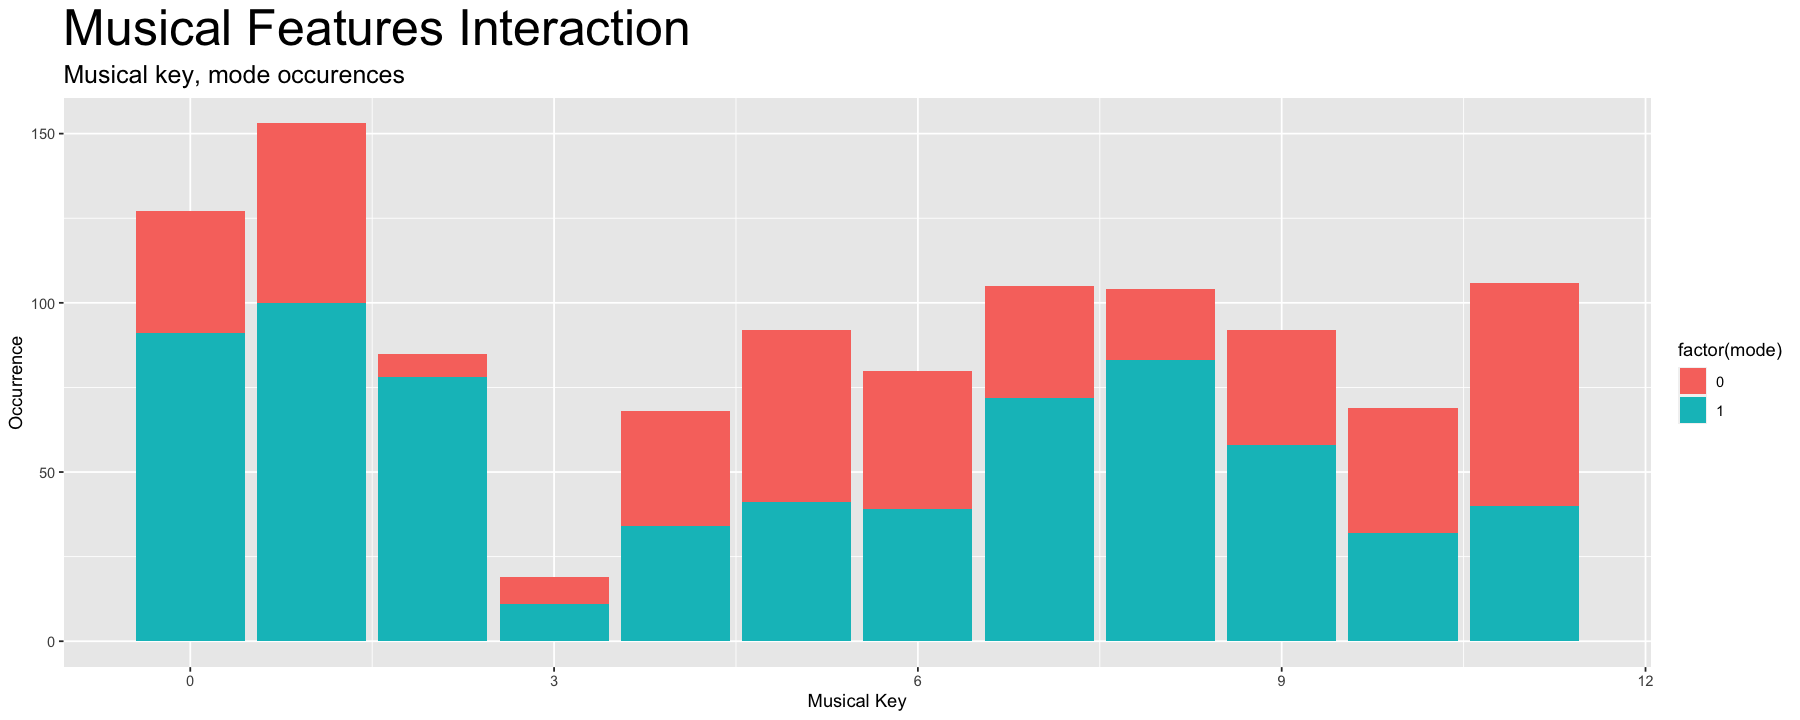

In [23]:
#chart2
plot3<-ggplot(hits) + 
    geom_bar(aes(x=key,fill = factor(mode)),stat = "count") + 
    labs(x='Musical Key',y='Occurrence',title=titleParams[[3]][1], subtitle = titleParams[[3]][2])+
    theme(plot.title = element_text(size=30),plot.subtitle=element_text(size=15))
    plot3